##  Churn Prediction Analysis of Telecommunication

### Q.1 What is Churn Prediction analysis?
#### A.1 - Churn analyisis prediction is a way of analyzing the customers who cancel their subcription, leave the company or stop a certain service, etc. So we are basically analyzing the customer's who are at potential risk of leaving the company or who could stop using it's services or products

In [146]:
# Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline


import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import iplot
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization

# Data Import
Telecom Churn Data

In [147]:


telcom = pd.read_csv(r"C:\Users\devki\OneDrive\Desktop\power bi\Data-Analyst\Data Analyst main\All Marketing Projects\Churn Prediction Analysis\Telco-Customer-Churn.csv")

# Data Overview

In [148]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [149]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [150]:
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Replacing all blank values with NaN

In [151]:

telcom = telcom.replace(" ", np.nan)
telcom.head() 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Checking for isNull Again

In [152]:
telcom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Data Cleaning
We will keep 20 input variables and 1 output variable (Churn) to create the model

1. customerID (Char w/ 7043 levels "0002-ORFBO","0003-MKNFE",)
2. gender (Factor w/ 2 levels "Female","Male")
3. SeniorCitizen (int)
4. Partner (Factor w/ 2 levels "No","Yes")
5. Dependents (Factor w/ 2 levels "No","Yes")
6. tenure (int)
7. PhoneService (Factor w/ 2 levels "No","Yes")
8. MultipleLines (Factor w/ 3 levels "No","No phone service",)
9. InternetService (Factor w/ 3 levels "DSL","Fiber optic",)
10. OnlineSecurity (Factor w/ 3 levels "No","No internet service",)
11. OnlineBackup (Factor w/ 3 levels "No","No internet service",)
12. DeviceProtection (Factor w/ 3 levels "No","No internet service",)
13. TechSupport (Factor w/ 3 levels "No","No internet service",)
14. StreamingTV (Factor w/ 3 levels "No","No internet service",)
15. StreamingMovies (Factor w/ 3 levels "No","No internet service",)
16. Contract (Factor w/ 3 levels "Month-to-month",)
17. PaperlessBilling (Factor w/ 2 levels "No","Yes")
18. PaymentMethod (Factor w/ 4 levels "Bank transfer (automatic)",)
19. MonthlyCharges (num)
20. otalCharges (num)
21. Churn (Factor w/ 2 levels "No","Yes")

In [153]:
missing_data = telcom.isnull()

In [154]:
# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

customerID
customerID
False    7043
Name: count, dtype: int64

gender
gender
False    7043
Name: count, dtype: int64

SeniorCitizen
SeniorCitizen
False    7043
Name: count, dtype: int64

Partner
Partner
False    7043
Name: count, dtype: int64

Dependents
Dependents
False    7043
Name: count, dtype: int64

tenure
tenure
False    7043
Name: count, dtype: int64

PhoneService
PhoneService
False    7043
Name: count, dtype: int64

MultipleLines
MultipleLines
False    7043
Name: count, dtype: int64

InternetService
InternetService
False    7043
Name: count, dtype: int64

OnlineSecurity
OnlineSecurity
False    7043
Name: count, dtype: int64

OnlineBackup
OnlineBackup
False    7043
Name: count, dtype: int64

DeviceProtection
DeviceProtection
False    7043
Name: count, dtype: int64

TechSupport
TechSupport
False    7043
Name: count, dtype: int64

StreamingTV
StreamingTV
False    7043
Name: count, dtype: int64

StreamingMovies
StreamingMovies
False    7043
Name: count, dtype: int64

Contract
Cont

Working with the Total Charges Column

In [155]:
#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert Total Charges to float type

### Q.2 - Converting Total Charges to Float Type

In [156]:
telcom = telcom.astype({'TotalCharges':'float'})
print(telcom.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [157]:
#Replace 'No internet service' to 'No' for the following 6 columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

In [158]:
#replace values in Senior Citizen column
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [159]:
# Convert Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"

telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

In [160]:
telcom.tenure_group.unique()

array(['Tenure_0-12', 'Tenure_24-48', 'Tenure_12-24', 'Tenure_gt_60',
       'Tenure_48-60'], dtype=object)

In [161]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [162]:
#Separating churn and non churn customers

churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

### Q.3 Can you give the count of customers who stayed and who left?

In [163]:


print(f"Number of customers who left: {len(churn)}")
print(f"Number of customers who stayed: {len(not_churn)}" )

Number of customers who left: 1869
Number of customers who stayed: 5163


In [164]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.keys().tolist()

In [165]:
cat_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'tenure_group']

In [166]:
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()

In [167]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_group']

In [168]:
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

In [169]:
Id_col

['customerID']

In [170]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [171]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

### Create a scatter plot of tenure and Total Charges

<Axes: xlabel='tenure', ylabel='TotalCharges'>

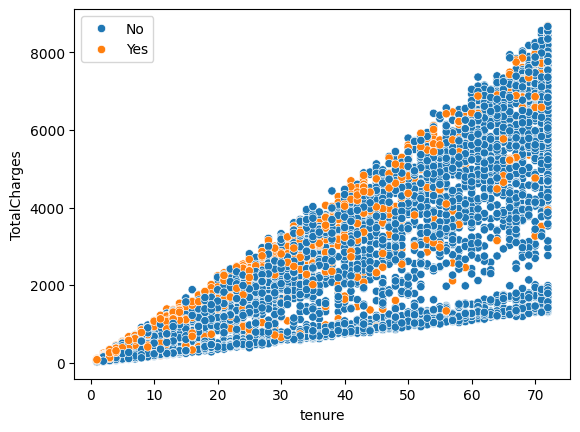

In [172]:
# Create a scatter plot of tenure and Total Charges

sns.scatterplot(data = telcom, x =telcom['tenure'], y = telcom['TotalCharges'], hue=telcom.Churn.tolist())

#### Create a Box plot of Churn and Total Charges

<Axes: xlabel='Churn', ylabel='TotalCharges'>

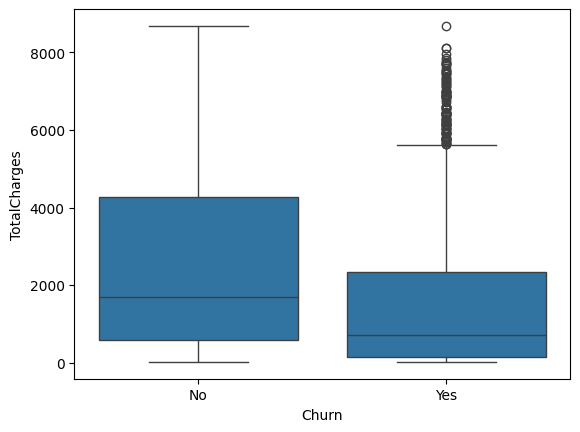

In [173]:
sns.boxplot(data= telcom, x="Churn", y="TotalCharges")

# Exploratory Data Analysis 

## Churn No-Churn Ratio

In [174]:
#labels
lab = telcom["Churn"].value_counts().keys().tolist()
#values
val = telcom["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Churn vs. Non-Churn",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)

iplot(fig)

In [175]:
data

[Pie({
     'hole': 0.5,
     'hoverinfo': 'label+value+text',
     'labels': [No, Yes],
     'marker': {'colors': ['royalblue', 'lime'], 'line': {'color': 'white', 'width': 1.3}},
     'rotation': 90,
     'values': [5163, 1869]
 })]

In [176]:
telcom['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [177]:
telcom.to_csv('clean_df.csv')

### Varibles distribution in Churn and Non-churn category: Pie Charts for Categorical variables


In [178]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    iplot(fig)

In [179]:
for i in cat_cols :
    plot_pie(i)
    

### Q. Comment on each and every chart. 
Gender Distribution in Customer Churn - Based on the pie chart for gender churn distribution we can see that there is no major difference, so we can say that gender is not a heavy bias or deciding factor when it comes to customer churn.

Senior Citizen Distribution - There are only less than 20% of senior citizen customers and because the data is very minute they are also not a heavy deciding factor in customer churn.

Partner Distribution in Customer churn - The partner distribution is also similar to the gender distribution, it is close to 50/50 meaninng whether you have a partner or not that does not make much of a difference on the churn data.

Dependant's distribution - Around 30% of people are dependant and 70% independent. A slight increase in churn could happen if dependant people's accounts were closed by their holders.

Phone service distribution - 90% of people have taken the phone service and 10% haven't meaning that phone service is a major contributer to company profits and only 10% of people don't have it. This consistency needs to be maintained.

### Varibles distribution in Churn and Non-churn category: Histograms for Numerical variables
#### Varibles distribution in Churn and Non-churn category: Histograms for Numerical variables

In [180]:
#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    iplot(fig)

In [181]:
for i in num_cols :
    histogram(i)
plt.show()

### Q. Comment on each and every chart. 
Tenure distribution in customer churn conveys that the customers chun rate is high compare having comparitively low tenure period. The number of churn customers decreases as the tenure period increases, but this is not the case for non-churn customers, ie, non-churn customers are almost equally distributed for all tenure periods, however there are slightly greater number of non-churn customers for very high and very low tenure period.

The MonthlyCharges distribution in customer churn shows that most of the churn customers pay high  monthly charge as compared to non- churn customers which pays less montly charge.

TotalCharges distribution in customer churn shows that churn customer pay low total charge as compared to non-churn customers.

#### Scatter Plot for Numerical variables


In [182]:
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "tenure",
                                       values = df["tenure"]),
                                  dict(label  = 'MonthlyCharges',
                                       values = df['MonthlyCharges']),
                                  dict(label  = 'TotalCharges',
                                       values = df['TotalCharges'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer churn",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    iplot(fig)


In [183]:
#scatter plot matrix
scatter_matrix(telcom)


### Data Pre-Processing

In [184]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [185]:
multi_cols

['MultipleLines',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'tenure_group']

In [186]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols)

In [187]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,False,False,False,True,False,True,False,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,...,False,False,False,False,True,False,False,True,False,False
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,...,False,False,False,False,True,True,False,False,False,False
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,...,False,True,False,False,False,False,False,True,False,False
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,24,1,1,0,1,...,False,False,False,False,True,False,True,False,False,False
7028,2234-XADUH,0,0,1,1,72,1,0,1,1,...,False,False,True,False,False,False,False,False,False,True
7029,4801-JZAZL,0,0,1,1,11,0,1,0,0,...,False,False,False,True,False,True,False,False,False,False
7030,8361-LTMKD,1,1,1,0,4,1,0,0,0,...,False,False,False,False,True,True,False,False,False,False


In [188]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [189]:
scaled

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [190]:
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [191]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,True,False,True,False,False,False,False,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,False,True,False,False,True,False,False,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,False,True,True,False,False,False,False,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,False,False,False,False,True,False,False,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,True,False,True,False,False,False,False,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,1,1,0,1,1,...,False,True,False,True,False,False,False,-0.343137,0.664868,-0.129180
7028,2234-XADUH,0,0,1,1,1,0,1,1,0,...,False,False,False,False,False,False,True,1.612573,1.276493,2.241056
7029,4801-JZAZL,0,0,1,1,0,1,0,0,0,...,True,False,True,False,False,False,False,-0.872808,-1.170004,-0.854514
7030,8361-LTMKD,1,1,1,0,1,0,0,0,0,...,False,True,True,False,False,False,False,-1.158016,0.319168,-0.872095


In [192]:
summary = telcom.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,5.046928e-01,0.500014,0.000000,0.000000,1.000000,1.000000,1.000000
SeniorCitizen,7032.0,1.624005e-01,0.368844,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7032.0,4.825085e-01,0.499729,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7032.0,2.984926e-01,0.457629,0.000000,0.000000,0.000000,1.000000,1.000000
PhoneService,7032.0,9.032992e-01,0.295571,0.000000,1.000000,1.000000,1.000000,1.000000
OnlineSecurity,7032.0,2.865472e-01,0.452180,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineBackup,7032.0,3.448521e-01,0.475354,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,7032.0,3.438567e-01,0.475028,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,7032.0,2.901024e-01,0.453842,0.000000,0.000000,0.000000,1.000000,1.000000
StreamingTV,7032.0,3.843857e-01,0.486484,0.000000,0.000000,0.000000,1.000000,1.000000


### Variable Summary

In [193]:

summary = (telcom[[i for i in telcom.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
iplot(figure)

In [194]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Step 1: Encode categorical columns
for column in telcom.select_dtypes(include=['object']).columns:
    telcom[column] = label_encoder.fit_transform(telcom[column])

# Step 2: Calculate the correlation matrix
correlation = telcom.corr()

# Step 3: Display the correlation matrix
print(correlation)


                                         customerID    gender  SeniorCitizen  \
customerID                                 1.000000  0.006235      -0.002368   
gender                                     0.006235  1.000000      -0.001819   
SeniorCitizen                             -0.002368 -0.001819       1.000000   
Partner                                   -0.026509 -0.001379       0.016957   
Dependents                                -0.011871  0.010349      -0.210550   
PhoneService                              -0.006987 -0.007515       0.008392   
OnlineSecurity                             0.015650 -0.016328      -0.038576   
OnlineBackup                              -0.000282 -0.013093       0.066663   
DeviceProtection                          -0.003770 -0.000807       0.059514   
TechSupport                                0.004250 -0.008507      -0.060577   
StreamingTV                               -0.004557 -0.007124       0.105445   
StreamingMovies                         

In [195]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [196]:
#convert to array
corr_array  = np.array(correlation)

In [197]:
correlation

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
customerID,1.000000,0.006235,-0.002368,-0.026509,-0.011871,-0.006987,0.015650,-0.000282,-0.003770,0.004250,...,-0.002969,0.007881,-0.013628,0.003908,0.024955,-0.028977,0.009578,0.007209,-0.004445,-0.000263
gender,0.006235,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.016328,-0.013093,-0.000807,-0.008507,...,0.000844,0.013199,-0.001050,-0.000649,-0.010516,-0.004319,0.016279,0.005285,-0.013779,0.000048
SeniorCitizen,-0.002368,-0.001819,1.000000,0.016957,-0.210550,0.008392,-0.038576,0.066663,0.059514,-0.060577,...,0.171322,-0.152987,-0.027713,0.001860,0.020383,0.014186,-0.002407,0.015683,0.219874,0.102411
Partner,-0.026509,-0.001379,0.016957,1.000000,0.452269,0.018397,0.143346,0.141849,0.153556,0.120206,...,-0.083207,-0.096948,-0.305061,-0.048481,0.028468,0.105341,0.280353,0.381912,0.097825,0.319072
Dependents,-0.011871,0.010349,-0.210550,0.452269,1.000000,-0.001078,0.080786,0.023639,0.013900,0.063053,...,-0.149274,0.056448,-0.145379,-0.001459,0.024645,0.031419,0.118090,0.163386,-0.112343,0.064653
PhoneService,-0.006987,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,...,0.002747,-0.004463,-0.006950,0.012307,-0.014778,-0.009750,0.020516,0.007877,0.248033,0.113008
OnlineSecurity,0.015650,-0.016328,-0.038576,0.143346,0.080786,-0.091676,1.000000,0.283285,0.274875,0.354458,...,-0.112295,-0.079918,-0.242409,-0.055662,0.007695,0.071663,0.263228,0.328297,0.296447,0.412619
OnlineBackup,-0.000282,-0.013093,0.066663,0.141849,0.023639,-0.052133,0.283285,1.000000,0.303058,0.293705,...,-0.000364,-0.174075,-0.267366,-0.084081,0.023085,0.099192,0.278788,0.361138,0.441529,0.510100
DeviceProtection,-0.003770,-0.000807,0.059514,0.153556,0.013900,-0.070076,0.274875,0.303058,1.000000,0.332850,...,-0.003308,-0.187325,-0.273920,-0.077332,0.044972,0.076854,0.275537,0.361520,0.482607,0.522881
TechSupport,0.004250,-0.008507,-0.060577,0.120206,0.063053,-0.095138,0.354458,0.293705,0.332850,1.000000,...,-0.114807,-0.084631,-0.238628,-0.072019,0.022137,0.062710,0.265396,0.325288,0.338301,0.432868


In [198]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
iplot(fig)

### Q. What do you observe?
#### A - So based on the correlation matrix here, we can draw conclusions based on the totalcharges variable and see which factors are correlated the most causing a churn.

#### These factors are - 

1. Internet Service - Fiber Optic - The monthly charges of fiber optic are high and can be a churning factor.
2. Total Charges vs Tenure - Short and long tenures and their costs need to be looked at.
3. Monthly charges of streaming movies and tv's could be lowered as they are correlated too.

These are some of the factors that the business should focus on to reduce customer churn as these are the most related factors and can cause variability in customer retention.

### Churn Prediction Analysis Part 2

In [199]:
# Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization

In [200]:
# Load the cleaned file
telcom = pd.read_csv("clean_df.csv")

In [201]:
telcom.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


In [202]:
telcom = telcom.drop('Unnamed: 0', axis = 1)

In [203]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


In [204]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [205]:
multi_cols

['MultipleLines',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'tenure_group']

In [206]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols)

In [207]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,False,False,False,True,False,True,False,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,...,False,False,False,False,True,False,False,True,False,False
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,...,False,False,False,False,True,True,False,False,False,False
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,...,False,True,False,False,False,False,False,True,False,False
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,24,1,1,0,1,...,False,False,False,False,True,False,True,False,False,False
7028,2234-XADUH,0,0,1,1,72,1,0,1,1,...,False,False,True,False,False,False,False,False,False,True
7029,4801-JZAZL,0,0,1,1,11,0,1,0,0,...,False,False,False,True,False,True,False,False,False,False
7030,8361-LTMKD,1,1,1,0,4,1,0,0,0,...,False,False,False,False,True,True,False,False,False,False


In [208]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [209]:
scaled

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [210]:
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [211]:
summary = telcom.describe().transpose()
summary



,count,mean,std,min,25%,50%,75%,max
gender,7032.0,5.046928e-01,0.500014,0.000000,0.000000,1.000000,1.000000,1.000000
SeniorCitizen,7032.0,1.624005e-01,0.368844,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7032.0,4.825085e-01,0.499729,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7032.0,2.984926e-01,0.457629,0.000000,0.000000,0.000000,1.000000,1.000000
PhoneService,7032.0,9.032992e-01,0.295571,0.000000,1.000000,1.000000,1.000000,1.000000
OnlineSecurity,7032.0,2.865472e-01,0.452180,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineBackup,7032.0,3.448521e-01,0.475354,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,7032.0,3.438567e-01,0.475028,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,7032.0,2.901024e-01,0.453842,0.000000,0.000000,0.000000,1.000000,1.000000
StreamingTV,7032.0,3.843857e-01,0.486484,0.000000,0.000000,0.000000,1.000000,1.000000


In [212]:

summary = (telcom[[i for i in telcom.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

In [242]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in telcom.select_dtypes(include=['object']).columns:
    telcom[column] = label_encoder.fit_transform(telcom[column])

correlation = telcom.corr()
print(correlation)


                                         customerID    gender  SeniorCitizen  \
customerID                                 1.000000  0.006235      -0.002368   
gender                                     0.006235  1.000000      -0.001819   
SeniorCitizen                             -0.002368 -0.001819       1.000000   
Partner                                   -0.026509 -0.001379       0.016957   
Dependents                                -0.011871  0.010349      -0.210550   
PhoneService                              -0.006987 -0.007515       0.008392   
OnlineSecurity                             0.015650 -0.016328      -0.038576   
OnlineBackup                              -0.000282 -0.013093       0.066663   
DeviceProtection                          -0.003770 -0.000807       0.059514   
TechSupport                                0.004250 -0.008507      -0.060577   
StreamingTV                               -0.004557 -0.007124       0.105445   
StreamingMovies                         

In [214]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [215]:
#convert to array
corr_array  = np.array(correlation)

In [216]:
correlation

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
customerID,1.000000,0.006235,-0.002368,-0.026509,-0.011871,-0.006987,0.015650,-0.000282,-0.003770,0.004250,...,-0.002969,0.007881,-0.013628,0.003908,0.024955,-0.028977,0.009578,0.007209,-0.004445,-0.000263
gender,0.006235,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.016328,-0.013093,-0.000807,-0.008507,...,0.000844,0.013199,-0.001050,-0.000649,-0.010516,-0.004319,0.016279,0.005285,-0.013779,0.000048
SeniorCitizen,-0.002368,-0.001819,1.000000,0.016957,-0.210550,0.008392,-0.038576,0.066663,0.059514,-0.060577,...,0.171322,-0.152987,-0.027713,0.001860,0.020383,0.014186,-0.002407,0.015683,0.219874,0.102411
Partner,-0.026509,-0.001379,0.016957,1.000000,0.452269,0.018397,0.143346,0.141849,0.153556,0.120206,...,-0.083207,-0.096948,-0.305061,-0.048481,0.028468,0.105341,0.280353,0.381912,0.097825,0.319072
Dependents,-0.011871,0.010349,-0.210550,0.452269,1.000000,-0.001078,0.080786,0.023639,0.013900,0.063053,...,-0.149274,0.056448,-0.145379,-0.001459,0.024645,0.031419,0.118090,0.163386,-0.112343,0.064653
PhoneService,-0.006987,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,...,0.002747,-0.004463,-0.006950,0.012307,-0.014778,-0.009750,0.020516,0.007877,0.248033,0.113008
OnlineSecurity,0.015650,-0.016328,-0.038576,0.143346,0.080786,-0.091676,1.000000,0.283285,0.274875,0.354458,...,-0.112295,-0.079918,-0.242409,-0.055662,0.007695,0.071663,0.263228,0.328297,0.296447,0.412619
OnlineBackup,-0.000282,-0.013093,0.066663,0.141849,0.023639,-0.052133,0.283285,1.000000,0.303058,0.293705,...,-0.000364,-0.174075,-0.267366,-0.084081,0.023085,0.099192,0.278788,0.361138,0.441529,0.510100
DeviceProtection,-0.003770,-0.000807,0.059514,0.153556,0.013900,-0.070076,0.274875,0.303058,1.000000,0.332850,...,-0.003308,-0.187325,-0.273920,-0.077332,0.044972,0.076854,0.275537,0.361520,0.482607,0.522881
TechSupport,0.004250,-0.008507,-0.060577,0.120206,0.063053,-0.095138,0.354458,0.293705,0.332850,1.000000,...,-0.114807,-0.084631,-0.238628,-0.072019,0.022137,0.062710,0.265396,0.325288,0.338301,0.432868


In [217]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

### Q. What do you observe?

So based on the correlation matrix above, we will draw observations between which features are inter-related in the business and cause a customer churn.

1. There is a negative linear correlation (-1) between phone service and no phone lines, which shows that the business need to market the advantage of having multiple phone lines to existing customers, this is a good solution to increase profits and increase customer base as well.

2. There is also a heavy negative correlation (-0.649) between tenure and month to month contract's, meaning that because majority of customer's have a month to month contract, it has a negative impact on their overall tenure, so the business needs to focus on retaining customers in this category, by marketing new schemes or providing longer contract's for cheaper rates.

3. There is a positive correlation (0.56) between tenure and two year contract's and also between two year contracts and tenure groups greater than 60, meaning that the business should keep their focus on retaining customer's who are currently not in the churn as well. Tenure groups aged 60 and above are loyal customers and are in the company for longer tenures, so they should obviously be retained through whichever marketing or persuasive technique the business wants to use. Discounts, gifts, vouchers all are a good start.

Let's look at all the tenure groups and see which age groups the business needs to focus on - 

1. Tenure group's 12-24 and 24-48 both have near to 0 correlation with tenure, meaning that customers in this age range are leaving the business almost immeadiatley or not for longer periods at all. In order to retain younger customers, longetive discounts and offers is a good start to start retaining them.

2. Tenure groups greater than 60 have the highest correlation rate (0.727), meaning these are the rock of the business, and the business has earned majority of it's earnings from this group.



## Model Building (We will build Decision Tree and Logistics Regression models)

In [218]:
# Separate the features from the class label and split the dataset into training a

In [219]:
# Import all the modules

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score

In [220]:
#splitting train and test data 
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)

In [221]:
##seperating dependent and independent variables
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
X_train = train[cols]
Y_train = train[target_col]
X_test  = test[cols]
Y_test  = test[target_col]

## Logistics Regression

In [222]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [223]:
# Predicting test set
y_pred = classifier.predict(X_test)

In [224]:
classifier.coef_

array([[-9.10100389e-02,  2.15529112e-01,  1.29170032e-03,
        -1.32806290e-01, -4.73370976e-01, -4.75902851e-01,
        -2.40298630e-01, -5.88690457e-02, -3.62825447e-01,
         7.96727441e-02,  1.54736902e-01,  3.68060836e-01,
        -3.99064355e-01, -2.20271016e-02, -7.43066209e-02,
        -2.14843747e-01,  2.31194550e-01, -5.11748881e-01,
         5.55388605e-01, -1.40318373e-01, -9.10468310e-01,
        -1.33675521e-01, -2.64104357e-01,  1.01592937e-01,
        -1.99211137e-01, -3.73281612e-01, -7.63217295e-01,
        -2.88090238e-01,  4.65437797e-01,  4.63753269e-01,
        -1.38393542e+00,  4.96778817e-01,  2.40919470e-01]])

In [225]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)

acc =accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 =f1_score(Y_test, y_pred)

print("Confusion Matrix:", cm)

print("Accurca:", acc)
print("Precision Score:", prec)
print("Recall Score:", recall)
print("f1_score:", f1)

Confusion Matrix: [[1151  117]
 [ 230  260]]
Accurca: 0.8026166097838453
Precision Score: 0.6896551724137931
Recall Score: 0.5306122448979592
f1_score: 0.5997693194925029


## Q. What do the scores mean? Is this a good model fit based on the scores. Make sure you print all the scores.

#### Confusion Matrix
1. True Positive - It mean the we correctly predicted 1(yes)(churn) an the people not leaving the network 0 No (not churn)
   so total number of true positive are 259.
2. True Negative - Predicted 0 and not leaving the network and the total number of true negative are 1151
3. False Positive - Also called Type1 error because we predicted 1 but they are not leaving the network(not churn) snd the total number of false positive are 231
4. False Negative - Also called Type2 error because we predicted 0 but they are leaving the network(churn) snd total number of false negative are 117

##### Accuracy
1. The accuarcy of the model using the logistic regeression is more than 80% so we can say it is good model to fit but we can improved ..

##### Precision
2. From the precision score it states  that the 68.8% of the customers retain  their service to the network.

##### Recall
3. From the recall score it states that 52.85% of the customers discontinuing their service of the network.

##### F-1 Score
4.  We can say f1 score is good when from the precison and recall it contains fewe false postive and few false negative. The range of f1 score is from 0 to 1 and our model f1 score is 60 which is not good.

Due to this model needs to be improved with proper feature selection.

Test Data Accuracy: 0.8026


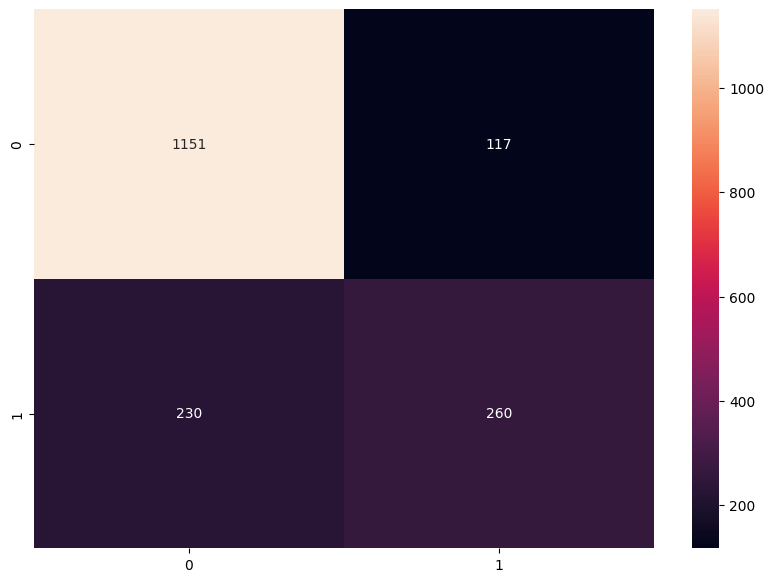

In [226]:
# Build the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

## Decision Tree

In [227]:
model_tree = DecisionTreeClassifier(random_state = 2)
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=2)

In [228]:
# Predicting test set
y_pred = model_tree.predict(X_test)

In [229]:
#Evaluating the Results
cm1 = confusion_matrix(Y_test, y_pred)
a =accuracy_score(Y_test, y_pred)
b =  precision_score(Y_test, y_pred)
c = recall_score(Y_test, y_pred)
d = f1_score(Y_test, y_pred)


print("Confusion Matrix:", cm1)

print("Accuracy:", a)
print("Precision Score:", b)
print("Recall Score:", c)
print("f1_score:", d)

Confusion Matrix: [[1046  222]
 [ 248  242]]
Accuracy: 0.732650739476678
Precision Score: 0.521551724137931
Recall Score: 0.49387755102040815
f1_score: 0.5073375262054507


#### Confusion Matrix
1. True Positive - It mean the we correctly predicted 1(yes)(churn) an the people not leaving the network 0 No (not churn)
   so total number of true positive are 242.
2. True Negative - Predicted 0 and not leaving the network and the total number of true negative are 1046
3. False Positive - Also called Type1 error because we predicted 1 but they are not leaving the network(not churn) snd the total number of false positive are 222
4. False Negative - Also called Type2 error because we predicted 0 but they are leaving the network(churn) snd total number of false negative are 248

##### Accuracy
1. The accuarcy of the model using the decision tree is around 73% so we can say it is  not  good model to fit but we can improved ..

##### Precision
2. From the precision score it states  that the 52.15% of the customers retain  their service to the network.

##### Recall
3. From the recall score it states that 49.38% of the customers discontinuing their service of the network.

##### F-1 Score
4.  We can say f1 score is good when from the precison and recall it contains fewe false postive and few false negative. The range of f1 score is from 0 to 1 and our model f1 score is 50 which is very bad.

Due to this model needs to be improved with proper feature selection.

### Q. Which model performs better? (Hint: compare the metrics)

To compare the models we see the f1 score means the model which have higher f1 score is best model.

So for logistic regression accuracy is 80% and f1 score is almost 60% as if we comared to decision tree accuracy of the model is 73% and f1 score is 50%  
From this we can say logistic model better to model to be fit.

## K- fold Cross Validation

### Q. What is K-fold cross validation?

A. So here we are using the K-fold cross validation technique because it will the split the dataset into k number of folds and to calculate the ability of the model from the given new data the k number of folds is used. Here K means number of group in which splitting of data is done. Here in the below cv = 10 means K-value =10 i.e 10 fold cross validation


In [230]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y =Y_train, cv =10)


In [231]:
# Check for accuracies
accuracies

array([0.80492424, 0.78219697, 0.82386364, 0.8219697 , 0.83301708,
       0.79127135, 0.78747628, 0.80075901, 0.80645161, 0.78937381])

### Q. What do accuracies tell?
We make the model first and implement it but how we can now that this model is good? at that time we see the accuracy of the model. The perfomance measure of model is convey by the accuracy.

As we are using K-fold validation techique and here we have use k = 10 it means we have 10 cross validation and in the above is the accuracies for the each flood.


In [232]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns =["features"]), pd.DataFrame(np.transpose(classifier.coef_), 
                                                                              columns =["Coef"])], 
                                                                              axis = 1)

,features,Coef
0,gender,-0.091010
1,SeniorCitizen,0.215529
2,Partner,0.001292
3,Dependents,-0.132806
4,PhoneService,-0.473371
5,OnlineSecurity,-0.475903
6,OnlineBackup,-0.240299
7,DeviceProtection,-0.058869
8,TechSupport,-0.362825
9,StreamingTV,0.079673


## Feature Seclection/Feature Engineering

In [233]:
from sklearn.feature_selection import RFE 
classifier = LogisticRegression()
rfe = RFE(estimator=classifier,n_features_to_select= 10)
rfe = rfe.fit(X_train, Y_train)

In [234]:
print(rfe.support_)

[False False False False False  True False False False False  True False
  True False False False  True  True  True False  True False False False
 False False False False  True  True  True False False]


In [235]:
X_train.columns[rfe.support_]

Index(['OnlineSecurity', 'StreamingMovies', 'MultipleLines_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_Two year',
       'tenure_group_Tenure_48-60', 'tenure_group_Tenure_gt_60', 'tenure'],
      dtype='object')

In [236]:
rfe.ranking_

array([20, 12, 24, 17, 15,  1, 14, 22,  6,  7,  1,  3,  1, 23, 21,  9,  1,
        1,  1, 18,  1, 11,  8, 19, 10,  4,  2,  5,  1,  1,  1, 16, 13])

In [237]:
# Build the model again after Feature Selection
classifier = LogisticRegression(random_state = 2)
classifier.fit(X_train[X_train.columns[rfe.support_]], Y_train)

LogisticRegression(random_state=2)

In [238]:
#Evaluating the Results
cm2 = confusion_matrix(Y_test, y_pred)

a3 = accuracy_score(Y_test, y_pred)
p3 =precision_score(Y_test, y_pred)
r3 =recall_score(Y_test, y_pred)
f3 = f1_score(Y_test, y_pred)
print(cm2)
print(a3)
print(p3)
print(r3)
print(f3)

[[1046  222]
 [ 248  242]]
0.732650739476678
0.521551724137931
0.49387755102040815
0.5073375262054507


Test Data Accuracy: 0.7327


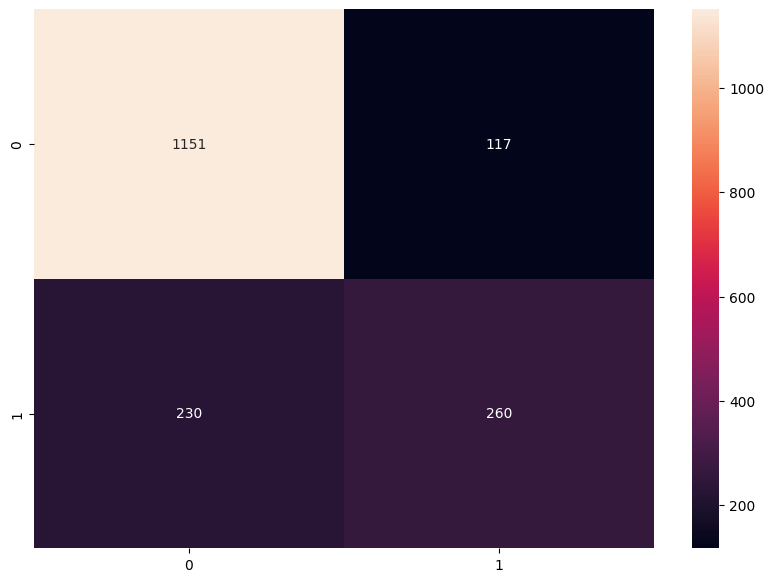

In [239]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

## Q. Has the model improved after feature selection?

Hence with the feature selection or without the feature selection model is not improved much because both have the similar accuracies.

In [240]:
# Subset the coefficents for RFE
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns =["features"]), pd.DataFrame(np.transpose(classifier.coef_), 
                                                                              columns =["Coef"])], axis = 1)

,features,Coef
0,OnlineSecurity,-0.487483
1,StreamingMovies,0.485371
2,MultipleLines_No,-0.485629
3,InternetService_Fiber optic,1.092354
4,InternetService_No,-0.846227
5,Contract_Month-to-month,0.816862
6,Contract_Two year,-0.875480
7,tenure_group_Tenure_48-60,0.888686
8,tenure_group_Tenure_gt_60,0.913695
9,tenure,-1.177793


In [241]:
##FINAL RESULTS
final_results = pd.concat([Y_test, telcom.customerID], axis =1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['customerID', 'Churn', 'predicted_churn']].reset_index(drop = True)
print(final_results)

      customerID  Churn  predicted_churn
0           4590    0.0                0
1            428    1.0                1
2           1930    0.0                0
3             62    0.0                0
4           2844    0.0                1
...          ...    ...              ...
1753        1427    0.0                1
1754        4234    0.0                0
1755        1424    1.0                0
1756        4863    0.0                0
1757        1876    0.0                0

[1758 rows x 3 columns]


### Q. Provide recommendations based on the feature selection. What should company target for to reduce churn?

By using the RFE company should target below things to reduce the churuning rate of the customer are

1) Online Security - The company has to increase the duration of the security plan with low cost.
For example company provide unlimited duration of online security which cost only 3$ or 4$ per month which can retain customers easily.

2) Streaming Movies - For the streaming of movies the high speed of internet is required so company should focus in this to reduce the churn .  Eg. Bell

3) MultipleLines_No  - The company focus on the advanced features  such as wirless adapter, good customer service, warranty this will help to reduce the churning rate of the customer.

4) InternetService_Fiber optic - The quality of the fiber optic should be improved. 

5) InternetService_No - The company should good internet just like bell which download speed up to 1.5gbps and upload upto 940 mbps upload speed with the activation fee of $59.

6) Contract_Month-to-month- To focus to the customer who have contract on monthly basis by reducing the cost/month with more benefits the customer.

7) Contract_Two year - Better internet quality, flexible cost, good customer service which help company to hold customer for longer term. 

8) tenure_group_Tenure_48-60 - Same as above recommendation can help to retain

9) tenure_group_Tenure_gt_60 

10) tenure

This is the feature in which company has to target to reduce the churn.
